# build dataset

In [3]:
import seismic_dataset_builder  
(X_train, y_train, v_train), (X_test, y_test, v_test), values, labels = seismic_dataset_builder.create_bp_synth()

# build and train calssification CNN

In [ ]:
import seismic_ml_kernel
classification_model = seismic_ml_kernel.ci_multi_train_classification (X_train, y_train, 30)

image has 4600 pixels


C:\Users\kostyad\Documents\Jupyter\seismic_fingerprint\seismic_ml_kernel.py:150: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fl..., inputs=Tensor("in...)`
  vision_model = Model(input=inp, output=flat) # To define a model, just specify its input and output layers


image has 2300 pixels
image has 2350 pixels
number of vision models 3
Vision models are ready
Classification model is ready
Classification model compiled
Train on 12364 samples, validate on 1374 samples


# test classification dataset

In [8]:
seismic_ml_kernel.ci_multi_test_classification (classification_model, X_test, y_test)

3422/3422 [==============================] - 112s   
[0.50053574065588013, 0.87288135568835035]


# classification on single image

sample: 2759
sample label: BP 0.4, 0.45, 0.5, 0.55
predicted label: BP 0.4, 0.45, 0.5, 0.55
sample category: 3
predicted category: 3
prediction accuracy: 100.0 %


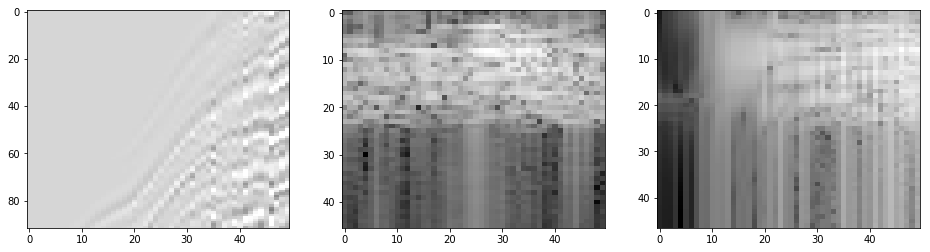

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
    
randidx, predicted_y = seismic_ml_kernel.ci_multi_evaluate_random_classification (classification_model, X_test)

correct_y = y_test[randidx]
color = 'green'
predicted_cat = predicted_y.argmax() 
if predicted_cat != correct_y:
    color = 'red'

import pandas as pd
table = pd.DataFrame(predicted_y*100).style.apply(seismic_ml_kernel.highlight_max, color=color, axis=None)


print('sample:', randidx)
print('sample label:', labels[y_test[randidx]])
print('predicted label:', labels[predicted_cat])
print('sample category:', y_test[randidx])
print('predicted category:', predicted_cat)
print('prediction accuracy:', predicted_y[predicted_cat]*100, '%')
table

# vision model 1
![title](outputs/classification_vision_model0.png)

# vision model 2
![title](outputs/classification_vision_model1.png)

# vision model 3
![title](outputs/classification_vision_model2.png)

# classification model
![title](outputs/classification_model.png)